# 仍然使用Titanic的数据集做实验，然后使用LogisticRegression()模型、RandomForestClassifier()模型进行预测，跟SGDClassifier()算法进行比较

## 1、LogisticRegression模型

In [1]:
from argparse import Namespace
from urllib import request
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# 参数设置
args=Namespace(
    seed=1234,
    data_file='Titanic.csv',
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,)
# 设置随机种子来保证实验的可重复性
np.random.seed(args.seed)

In [6]:
# 从网页上获取Titanic的数据集
url = "https://raw.githubusercontent.com/biLove/titanic_data_analysis/master/titanic-data.csv"
response = request.urlopen(url)
html = response.read()
with open(args.data_file, 'wb') as f:
    f.write(html)

In [7]:
df=pd.read_csv(args.data_file,header=0)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
def preprocessing(df):
#     删除含有空值的数据
    df=df.dropna()
#     删除与预测结果相关性较低的特征值
    non_correlation=['Name','Cabin','Ticket']
    df=df.drop(non_correlation,axis=1)
    
#     处理数据集中的类别变量
# 对于数据集中的类别变量处理
    category_features=['Pclass','Sex','Embarked']
    df=pd.get_dummies(df,columns=category_features)
    return df

In [10]:
# 数据预处理
df=preprocessing(df)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
6,7,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
10,11,1,4.0,1,1,16.7000,0,0,1,1,0,0,0,1
11,12,1,58.0,0,0,26.5500,1,0,0,1,0,0,0,1
21,22,1,34.0,0,0,13.0000,0,1,0,0,1,0,0,1
23,24,1,28.0,0,0,35.5000,1,0,0,0,1,0,0,1
27,28,0,19.0,3,2,263.0000,1,0,0,0,1,0,0,1
52,53,1,49.0,1,0,76.7292,1,0,0,1,0,1,0,0
54,55,0,65.0,0,1,61.9792,1,0,0,0,1,1,0,0


In [14]:
# 划分数据集
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],train_size=args.train_size)

print ("X-Train size: {0}, test size: {1}".format(len(X_train), len(X_test)))
print ("y-Train size: {0}, test size: {1}".format(len(y_train), len(y_test)))

X-Train size: 137, test size: 46
y-Train size: 137, test size: 46


In [15]:
# 标准化数据集
standard_X=StandardScaler().fit(X_train)
standard_X_train=standard_X.transform(X_train)
standard_X_test=standard_X.transform(X_test)

## 1、使用LogisticRegression()进行预测
在LogisticRegression类中的主要参数如下：

`linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0,
                                fit_intercept=True, intercept_scaling=1,
                                class_weight=None, random_state=None,
                                solver='lbfgs', max_iter=100, multi_class='auto',
                                verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`
                                
penalty:l1正则化 or l2正则化，默认为l2

solver:即选择逻辑回归损失函数优化算法，默认为liblinear

    1、liblinear:应用了坐标下降算法（coordinate Descent,CD），对于小型数据集来说效果更好，可以使用l1正则化
    2、lbfgs、sag、newton-cg:只支持L2正则化，对高维数据收敛更快，适用于大型数据集
    3、lbfgs:拟牛顿法
    4、sag:随机平均梯度下降法
    5、saga:sag的一种变体，除了支持L2之外还支持L1，因此对于稀疏多项式logistic回归，往往选择该求解器
    
因此对于大数据集，可以使用LogisticRegression+saga的模型，也可以使用SGDClassifier+log的组合方式去求解

In [16]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(penalty='l2',solver='liblinear',max_iter=args.num_epochs)
logistic.fit(X=standard_X_train,y=y_train)

LogisticRegression(solver='liblinear')

In [17]:
# 概率
pred_prob_test=logistic.predict_proba(standard_X_test)
print('测试集预测概率pred_prob_test：',pred_prob_test)
# 预测
pred_train=logistic.predict(standard_X_train)
pred_test=logistic.predict(standard_X_test)


测试集预测概率pred_prob_test： [[0.81118156 0.18881844]
 [0.52776708 0.47223292]
 [0.62065991 0.37934009]
 [0.36743219 0.63256781]
 [0.36816645 0.63183355]
 [0.04580503 0.95419497]
 [0.64832852 0.35167148]
 [0.56743856 0.43256144]
 [0.1024486  0.8975514 ]
 [0.02736199 0.97263801]
 [0.10544537 0.89455463]
 [0.58794552 0.41205448]
 [0.47618348 0.52381652]
 [0.08434708 0.91565292]
 [0.02732905 0.97267095]
 [0.43033522 0.56966478]
 [0.88365095 0.11634905]
 [0.66798709 0.33201291]
 [0.09493064 0.90506936]
 [0.03442945 0.96557055]
 [0.82018119 0.17981881]
 [0.70788039 0.29211961]
 [0.68317981 0.31682019]
 [0.53831756 0.46168244]
 [0.03119345 0.96880655]
 [0.02373221 0.97626779]
 [0.02050002 0.97949998]
 [0.12246425 0.87753575]
 [0.54466067 0.45533933]
 [0.06986998 0.93013002]
 [0.24508277 0.75491723]
 [0.58281975 0.41718025]
 [0.84659698 0.15340302]
 [0.83111196 0.16888804]
 [0.17333795 0.82666205]
 [0.09046449 0.90953551]
 [0.85405244 0.14594756]
 [0.41809122 0.58190878]
 [0.04831827 0.95168173]
 [

In [18]:
# 评估指标
from sklearn.metrics import accuracy_score

In [20]:
# 正确率
train_soc=accuracy_score(y_train,pred_train)
test_soc=accuracy_score(y_test,pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_soc, test_soc))

train acc: 0.79, test acc: 0.74


In [21]:
# 其他的评价指标：准确率、召回率、F1-score
import itertools
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm,classes):
    cmap=plt.cm.Blues
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    plt.grid(False)
    
    fmt='d'
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.85      0.74      0.79        31

    accuracy                           0.74        46
   macro avg       0.72      0.74      0.72        46
weighted avg       0.76      0.74      0.75        46



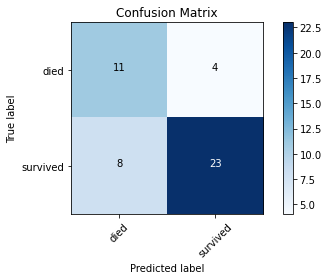

In [27]:
cm=confusion_matrix(y_test,pred_test)
plot_confusion_matrix(cm,classes=['died','survived'])
print(classification_report(y_test,pred_test))

## 2、使用随机森林RandomForestClassifier()进行预测
集成学习方法：生成多个分类器/模型，各自独立的学习和做出预测，这些预测最后结合成组合预测，因此优于任何一个单分类做出的预测

随机森林：包含多个决策树的分类器，不同的决策树之间没有关联。当进行分类任务时，新的输入样本进入就让森林中的每一个决策树分别进行判断和分类，每个决策树会得到一个自己的分类结果，决策树的分类结果中哪一个分类最多，那么随机森林就会把这个结果当作最后的结果

决策树：一种树形结构，每一个内部节点代表一种判断，每个分支代表一个判断结果的输出，最后的叶子节点表示一种分类结果

In [28]:
# 决策树预估计
from sklearn.tree import DecisionTreeClassifier
decisionTree=DecisionTreeClassifier(criterion='entropy')  #entropy:信息增益 gini:基尼系数
decisionTree.fit(standard_X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
pred_train=decisionTree.predict(standard_X_train)
pre_test=decisionTree.predict(standard_X_test)

In [30]:
# 正确率
train_soc=accuracy_score(y_train,pred_train)
test_soc=accuracy_score(y_test,pred_test)
print ("决策树——train acc: {0:.2f}, test acc: {1:.2f}".format(train_soc, test_soc))

决策树——train acc: 1.00, test acc: 0.74


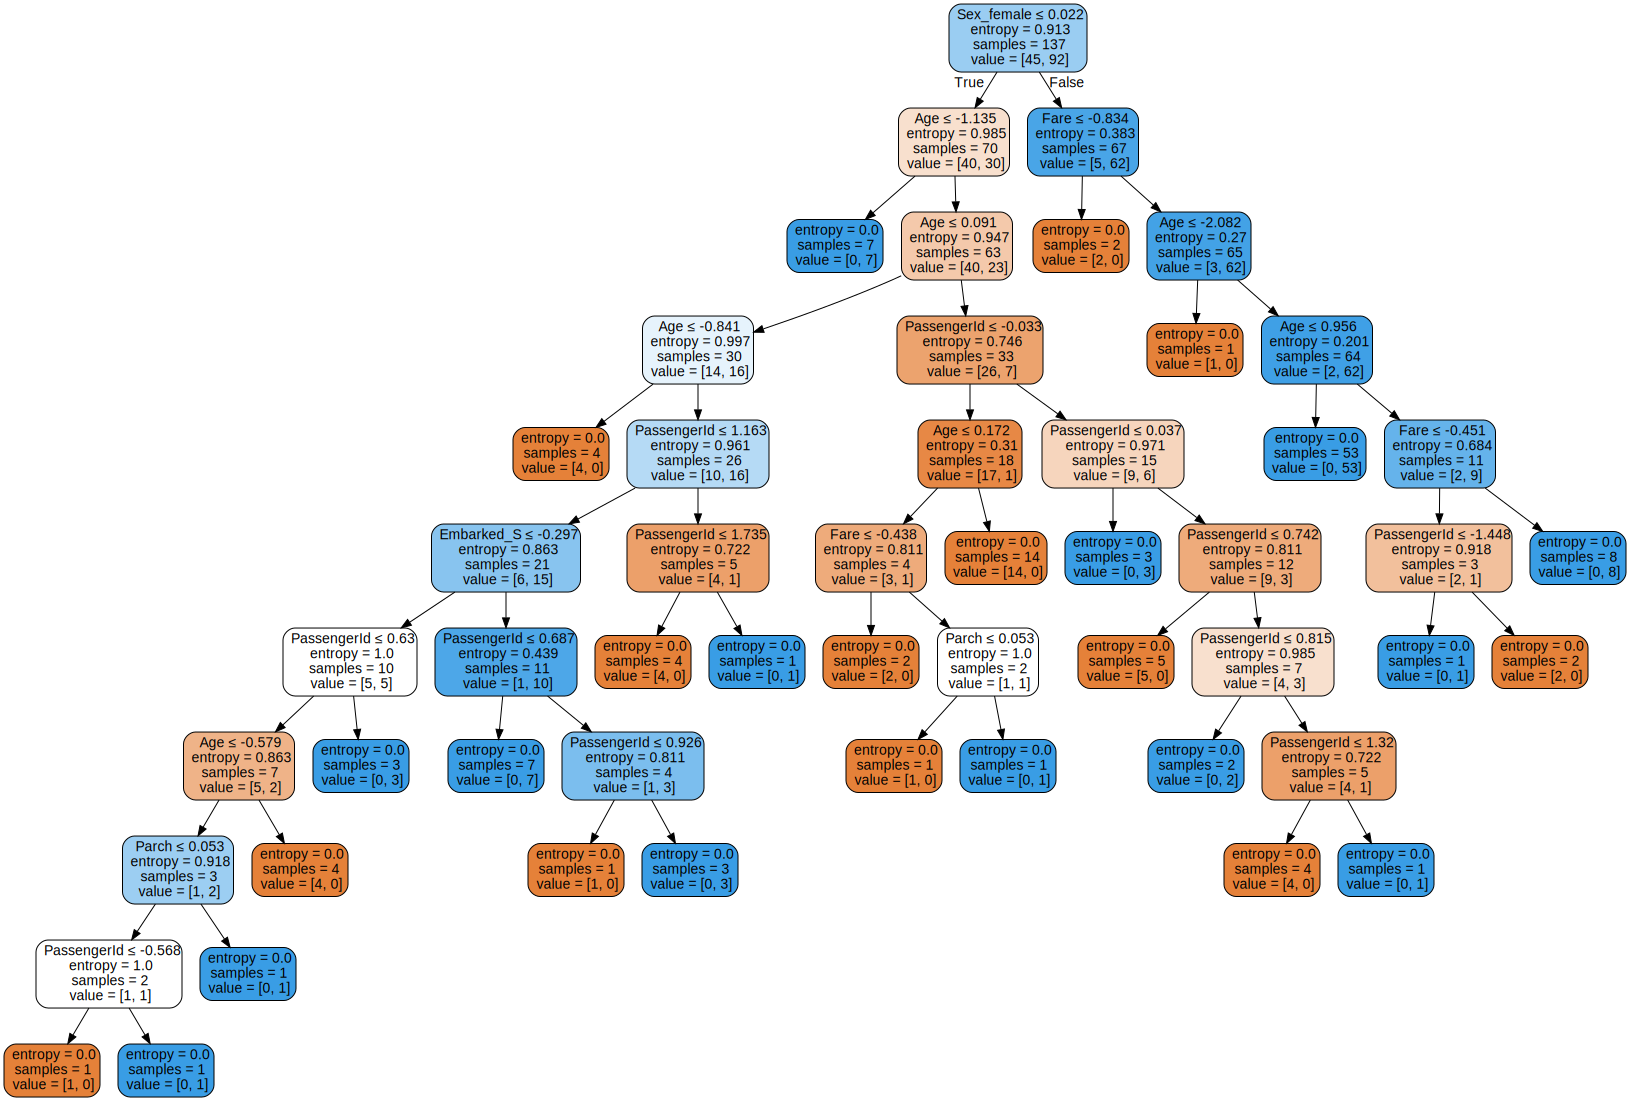

In [34]:
# 可视化决策树
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(decisionTree,out_file=None,feature_names=X_train.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [35]:
# 使用随机森林进行预测
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### 一、不使用网格搜索来确定超参数

In [36]:
randomForest=RandomForestClassifier()
randomForest.fit(standard_X_train,y_train)
pred_train=randomForest.predict(standard_X_train)
pred_test=randomForest.predict(standard_X_test)

In [37]:
# 准确率
train_soc=accuracy_score(y_train,pred_train)
test_soc=accuracy_score(y_test,pred_test)
print ("不使用网格搜索的随机森林——train acc: {0:.2f}, test acc: {1:.2f}".format(train_soc, test_soc))

不使用网格搜索的随机森林——train acc: 1.00, test acc: 0.74


#### 二、使用网格搜索

In [41]:
randomForest=RandomForestClassifier()
# 加入网格搜索与交叉验证
# 参数准备
# n_estimator:森林里数目的数量
# max_depth:数的最大深度
param_dict={'n_estimators':[120,200,300,500,800,1200],'max_depth':[5,8,15,25,30]}
randomForest=GridSearchCV(randomForest,param_grid=param_dict,cv=3)  #cv:三折交叉验证
randomForest.fit(standard_X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'n_estimators': [120, 200, 300, 500, 800, 1200]})

In [42]:
pred_train=randomForest.predict(standard_X_train)
pred_test=randomForest.predict(standard_X_test)

# 评估准确率
train_soc=accuracy_score(y_train,pred_train)
test_soc=accuracy_score(y_test,pred_test)
print ("使用网格搜索的随机森林——train acc: {0:.2f}, test acc: {1:.2f}".format(train_soc, test_soc))

使用网格搜索的随机森林——train acc: 1.00, test acc: 0.74


In [43]:
# 查看最佳参数，以及交叉验证的结果
best_para=randomForest.best_params_
best_valid=randomForest.cv_results_
best_soc=randomForest.best_score_

print('最佳参数：',best_para)
print('最佳结果：',best_soc)
print('交叉验证：',best_valid)

最佳参数： {'max_depth': 15, 'n_estimators': 120}
最佳结果： 0.7594202898550725
交叉验证： {'mean_fit_time': array([0.25192674, 0.29431041, 0.43948086, 0.73094424, 1.16894253,
       1.75313759, 0.17685906, 0.29440967, 0.44527594, 0.73693109,
       1.17501911, 1.78603204, 0.1764977 , 0.2945927 , 0.44091018,
       0.73520072, 1.17596706, 1.76214337, 0.17670973, 0.29446538,
       0.44116799, 0.73530149, 1.17553846, 1.76255242, 0.17712355,
       0.29439004, 0.44074114, 0.73524229, 1.17600314, 1.76344426]), 'std_fit_time': array([6.63752036e-02, 1.95241995e-04, 6.25975455e-04, 1.05896612e-03,
       1.26199243e-03, 8.08616637e-04, 5.52645055e-04, 6.72285784e-04,
       2.95568551e-04, 2.91782755e-03, 2.47103599e-03, 3.00154462e-02,
       3.01813877e-04, 3.51750307e-04, 9.20393143e-04, 6.72895187e-04,
       1.62456949e-03, 3.65346592e-03, 1.50511735e-04, 5.96921067e-05,
       7.03041703e-04, 4.96135066e-04, 1.11425227e-03, 1.49822185e-03,
       3.39138228e-04, 3.49150657e-04, 3.75222992e-04, 1.357

#### 由上面的结果可知，当森林中树的数量为120，深度为15时，预测效果最好，准确率为0.759

## 从上面的两个例子可以看出，使用决策树的，或者随机森林的算法模型，准确率会更高一些，但是单独的决策树容易产生过拟合的情况，这里由于数据集不是特别大，所以效果还行，但当数据量更加庞大的时候使用随机森林的效果更好，准确率也更高